In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from scipy.integrate import odeint

### show resonance capture with Andoyer Hamiltonian

In [127]:
twopi = 2*np.pi


# H(p,phi,t) = p^2/2 + b p + p^1/2 epsilon cos q
# dHdp = p + b + 0.5 * epsilon cos phi /p^1/2
# dHdphi = -epsilon * p^1/2 sin phi
def func(y,t,parms):
    b0       = parms[0]
    epsilon0 = parms[1]
    bdot     = parms[2]
    edot     = parms[3]
    b        = b0      + bdot*t
    epsilon = epsilon0 + edot*t
    phi = y[0]
    p = y[1]
    dphidt = p + b + 0.5*epsilon * np.cos(phi)/np.sqrt(np.abs(p))
    dpdt = epsilon * np.sqrt(np.abs(p))*np.sin(phi)
    #print(b)
    return np.array([dphidt,dpdt])

# integrate a single step with odeint
def one_step(t,y0,dt,parms):
    tarr = np.array([t,t+dt])
    yout = odeint(func,y0,tarr,args=(parms,))   # pass a tuple to odeint!
    #print(yout)
    ynew = np.squeeze(yout[1])
    ynew[0] = ynew[0]%twopi  # keep phi in [0,2pi]
    return ynew

# store output in some arrays for nn steps
def n_steps(t0,y0,dt,parms,nn):
    y = y0
    t = t0
    phiarr = []
    parr = []
    tarr = []
    phiarr = np.append(phiarr,y[0])
    parr = np.append(parr,y[1])
    tarr = np.append(tarr,t)
    for i in range(nn):
        ynew = one_step(t,y,dt,parms)
        y = ynew
        t += dt 
        phiarr = np.append(phiarr,y[0])
        parr = np.append(parr,y[1])
        tarr = np.append(tarr,t)
    return phiarr,parr,tarr

In [140]:
# plot stuff!! as a function of time
def plotit(tarr,qarr,parr,ofile):
    fig, axarr = plt.subplots(2,1,figsize=(3,3),dpi=200)
    plt.subplots_adjust(wspace=0,hspace=0,top=0.98,right=0.98,bottom=0.15,left=0.20)
    axarr[1].set_xlabel(r'time $t$')
    axarr[0].set_ylabel(r'$\phi$')
    axarr[1].set_ylabel(r'$p$')
    axarr[0].set_ylim([0,2*np.pi])

    axarr[0].plot(tarr,qarr,'r.',markeredgecolor='none',ms=2,lw=1)
    axarr[1].plot(tarr,parr,'b-',markeredgecolor='none',ms=2,lw=1)
    if (len(ofile)>3):
        plt.savefig(ofile,dpi=300)  # save a file

<IPython.core.display.Javascript object>


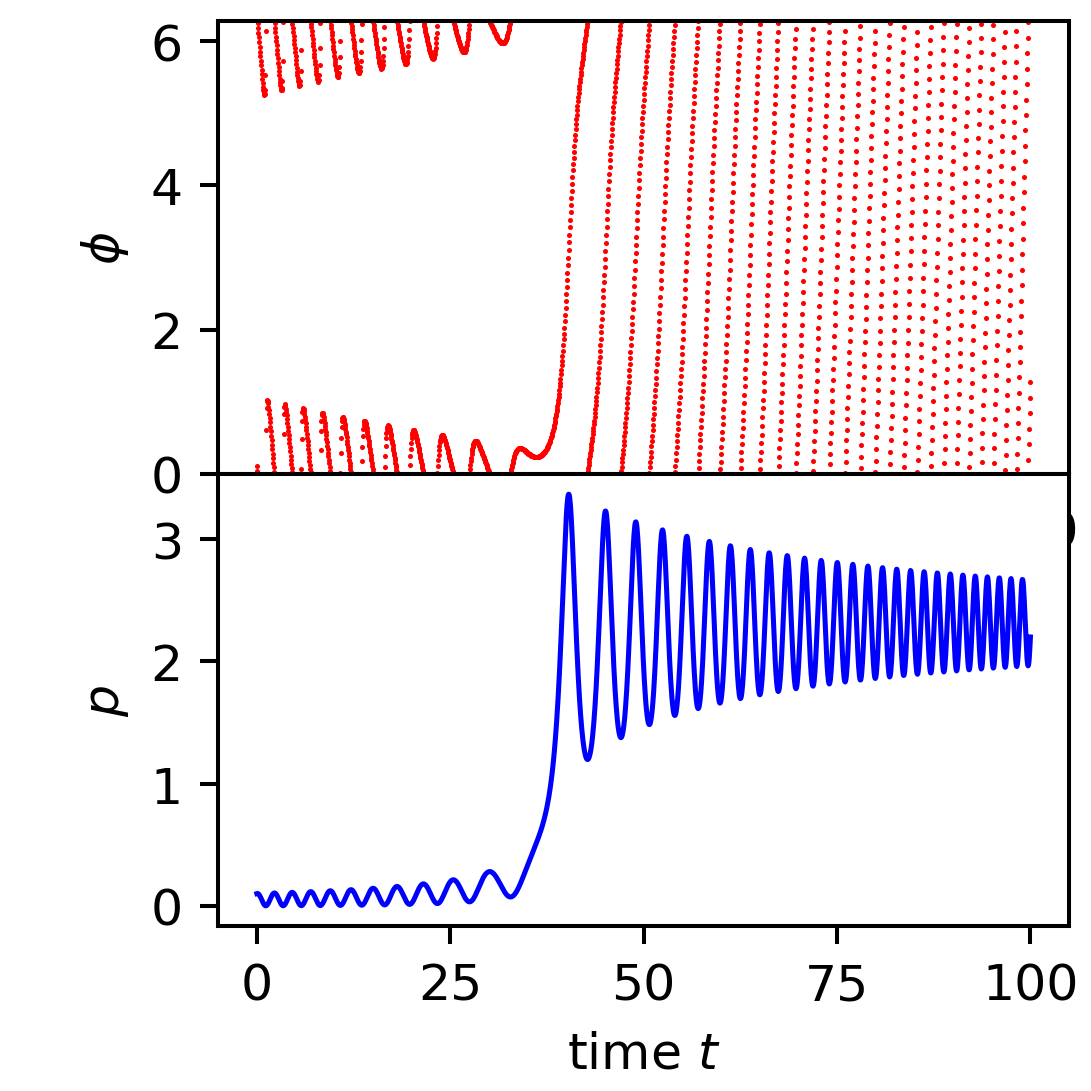

99.99999999999646 1.9999999999998233


In [144]:
y0 = np.array([0.1,0.1])
dt  = 0.05
b0=-3; bdot = 0.05
parms = np.array([b0,1,bdot,0.0])   # b0 epsilon0 bdot epsilondot
t0=0; nn = 2000; 
#ynew = one_step(t,y0,dt,parms)
phiarr,parr,tarr = n_steps(t0,y0,dt,parms,nn)
ofile = "jump.png"
plotit(tarr,phiarr,parr,ofile)
tmax = tarr[-1]
bmax = b0 + bdot*tmax
print(tmax,bmax)

<IPython.core.display.Javascript object>


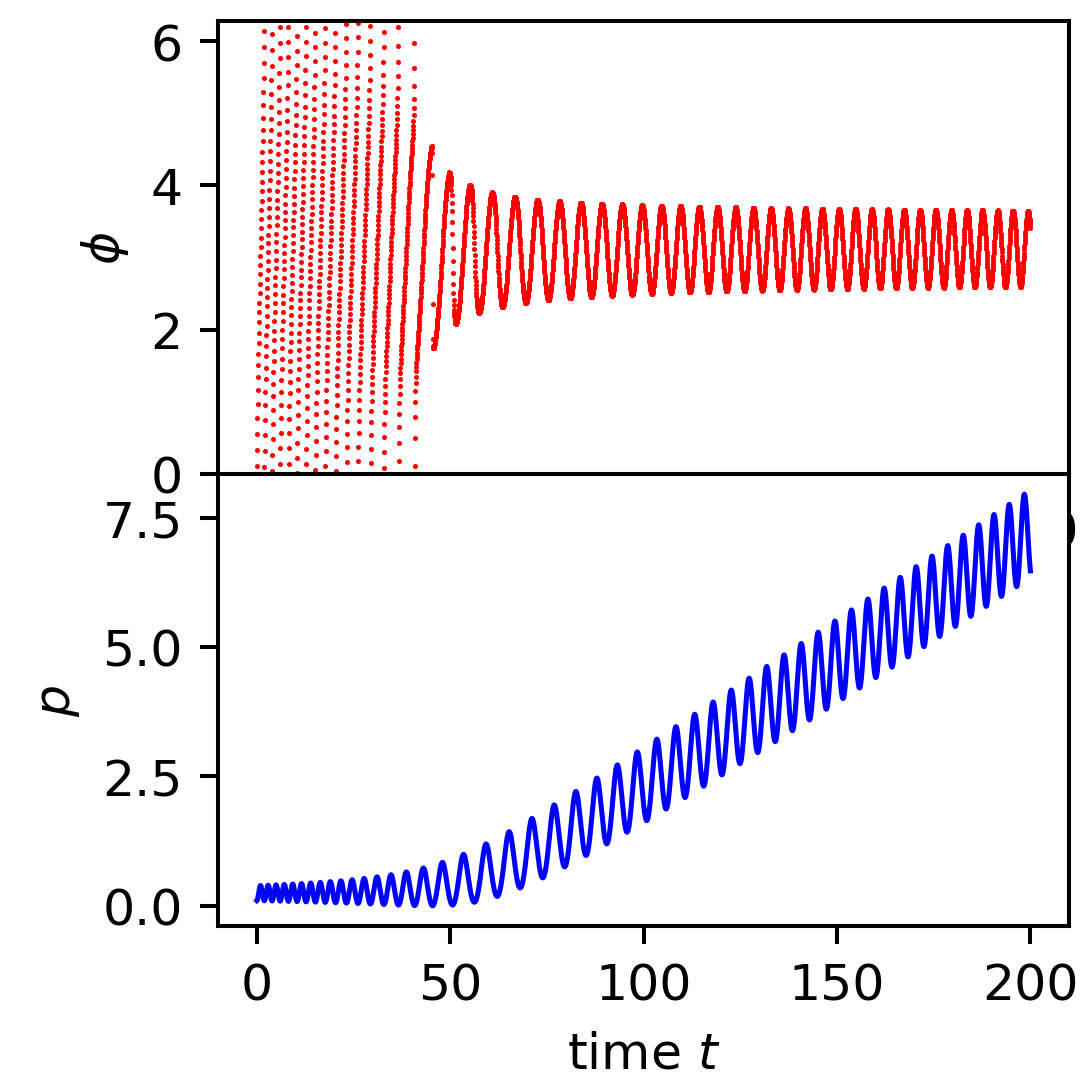

200.00000000001123 -7.000000000000561


In [145]:
y0 = np.array([0.1,0.1])
dt  = 0.05
b0=3; bdot = -0.05
parms = np.array([b0,1,bdot,0.0])   # b0 epsilon0 bdot epsilondot
t0=0; nn = 4000; 
#ynew = one_step(t,y0,dt,parms)
phiarr,parr,tarr = n_steps(t0,y0,dt,parms,nn)
ofile = "cap.png"
plotit(tarr,phiarr,parr,ofile)
tmax = tarr[-1]
bmax = b0 + bdot*tmax
print(tmax,bmax)